In [2]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

import openml

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [3]:
# openml.datasets.list_datasets()

In [4]:
dataset = openml.datasets.get_dataset(179)
X, y, categorical, col_names = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
0,2,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States
1,3,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States
2,2,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States
3,3,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States
4,1,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419.0,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States
48838,4,NaN,321403.0,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,2,United-States
48839,2,Private,374983.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States
48840,2,Private,83891.0,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States


In [5]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df1 = X[["age"]]
df2 = X[["education-num"]]
display(df1)
display(df2)


,age
0,2
1,3
2,2
3,3
4,1
...,...
48837,2
48838,4
48839,2
48840,2


,education-num
0,13
1,13
2,9
3,7
4,13
...,...
48837,13
48838,9
48839,13
48840,13


,age,education-num
0,2,13
1,3,13
2,2,9
3,3,7
4,1,13
...,...,...
48837,2,13
48838,4,9
48839,2,13
48840,2,13


In [22]:
# convert categorical columns in dummies
X_encoded = pd.DataFrame([])
for i, cat_type in enumerate(categorical):
    col_name = col_names[i]
    print(col_name)
    if cat_type == True:
        df = pd.get_dummies(X[col_name], drop_first=True).astype('int64')
    else:
        df = X[[col_name]]
    X_encoded = pd.merge(X_encoded, df, left_index=True, right_index=True)
X_encoded

age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capitalgain
capitalloss
hoursperweek


MergeError: Passing 'suffixes' which cause duplicate columns {'2_x', '1_x', '3_x', '4_x'} is not allowed.

In [21]:
# standardise
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'Private'

In [ ]:
# build model
svm = SVC(kernel='rbf', gamma='scale', C=1.0)
svm.fit(X_train, y_train)

Accuracy: 0.963
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.95      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.97      1396
           7       0.92      0.97      0.95      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.93      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



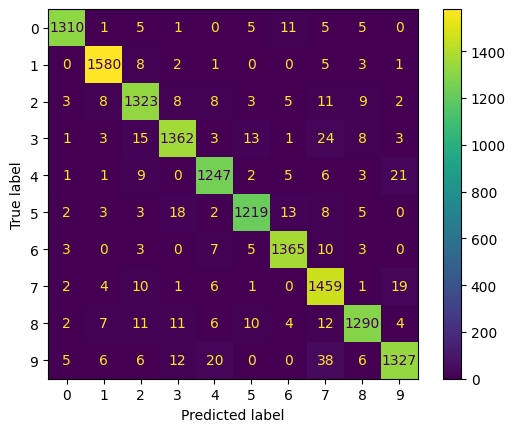

In [ ]:
# evaluate model
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
# # grid search

# svm_classifier = SVC()

# param_grid = {
#     'C': [0.1, 1, 10, 50, 100],
#     'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
#     'kernel': ['rbf']
# }

# grid_search = GridSearchCV(
#     estimator=svm_classifier, 
#     param_grid=param_grid, 
#     scoring='accuracy', 
#     cv=3,
#     verbose=2
# )

# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=10.1min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 8.9min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 8.3min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 8.5min


In [ ]:
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()
# plt.show()